## Mini proyecto 

### Librerias a utilizar

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

Lectura de datos

In [5]:
Train_df = pd.read_csv('./train.csv')
Test_df = pd.read_csv('./test.csv')

In [15]:
Train_df.rename(columns={'obscene':'obscenidad','insult':'insulto','toxic':'toxico','severe_toxic':'severamente_toxico','identity_hate':'discurso_odio','threat':'amenaza'},inplace=True)
Test_df.rename(columns={'obscene':'obscenidad','insult':'insulto','toxic':'toxico','severe_toxic':'severamente_toxico','identity_hate':'discurso_odio','threat':'amenaza'},inplace=True)


In [30]:
cols_target = ['obscenidad','insulto','toxico','severamente_toxico','discurso_odio','amenaza']

 Los datos de entrenamiento cuentan con una columna de id y comentario para cada mensaje, ademas cada mensaje tiene una columna con un valor binario para indicar si el mensaje fue etiquetado como toxico, severamente_toxico, obsenidad, amenza, insulto o discurso de odio

In [33]:
 Train_df[cols_target].sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Length: 159571, dtype: int64

In [26]:
Train_df.head(3)

,id,comment_text,toxico,severamente_toxico,obscenidad,amenaza,insulto,discurso_odio
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [23]:
print('Se cuentan con ',Test_df.shape[0], ' comentarios en los datos de testeo')

Se cuentan con  153164  comentarios en los datos de entrenamiento


In [25]:
print('Se cuentan con ', Train_df.shape[0], ' comentarios en los datos de entrenamiento')

Se cuentan con  159571  comentarios en los datos de entrenamiento


In [8]:
unlabelled_in_all = train_df[(train_df['toxic']!=1) & (train_df['severe_toxic']!=1) & (train_df['obscene']!=1) & 
                            (train_df['threat']!=1) & (train_df['insult']!=1) & (train_df['identity_hate']!=1)]
print('Percentage of unlabelled comments is ', len(unlabelled_in_all)/len(train_df)*100)

Percentage of unlabelled comments is  89.83211235124176


In [9]:
no_comment = train_df[train_df['comment_text'].isnull()]
len(no_comment)

0

In [10]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [11]:
no_comment = test_df[test_df['comment_text'].isnull()]
no_comment

,id,comment_text


In [12]:
# let's see the total rows in train, test data and the numbers for the various categories
print('Total rows in test is {}'.format(len(test_df)))
print('Total rows in train is {}'.format(len(train_df)))
print(train_df[cols_target].sum())

Total rows in test is 153164
Total rows in train is 159571
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


In [13]:
# Let's look at the character length for the rows in the training data and record these
train_df['char_length'] = train_df['comment_text'].apply(lambda x: len(str(x)))

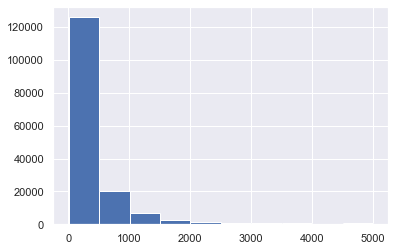

In [14]:
# look at the histogram plot for text length
sns.set()
train_df['char_length'].hist()
plt.show()

In [15]:
data = train_df[cols_target]

<AxesSubplot:title={'center':'Correlation of features & targets'}>

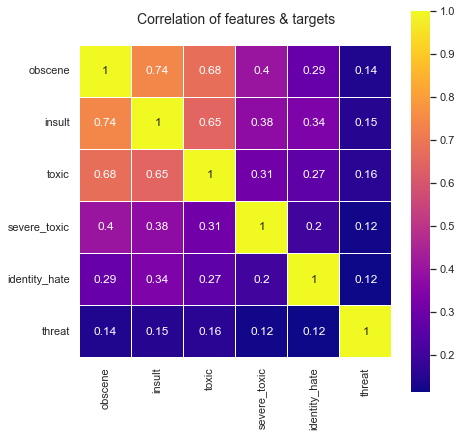

In [16]:
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [17]:
test_df['char_length'] = test_df['comment_text'].apply(lambda x: len(str(x)))

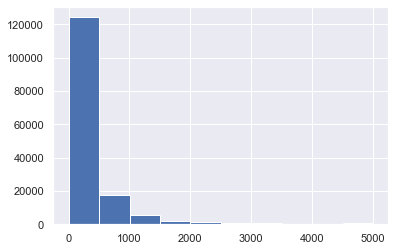

In [18]:
plt.figure()
plt.hist(test_df['char_length'])
plt.show()